# OD分析

## 坏车识别；OD pair

In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely import geos
from shapely.geometry import Point
import fiona
import matplotlib.pyplot as plt
from fiona.crs import from_epsg,from_string

In [39]:
df = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/曲阜数据/5-26 to 6-13/qufu_526_613_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
#df = df[:10000]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424634 entries, 0 to 424633
Data columns (total 4 columns):
bid     424634 non-null int64
lat     424634 non-null float64
lng     424634 non-null float64
time    424634 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 13.0+ MB


In [32]:
import cProfile

class C():
    def __init__(self, fout):
        self.fout = fout
    def p1(self, row):
        self.fout.write('%s,%s,%s,%s\n'%(row.bid, row.lat, row.lng, row.time))
    def p2(self, datum):
        self.fout.write('%s,%s,%s,%s\n'%(datum[0], datum[1], datum[2], datum[3]))
        
def numpyiter():
    with open('test1.csv', 'w') as fo1:
        c1 = C(fo1)
        for index, row in df.iterrows():
            c1.p1(row)

def indexiter():
    with open('test2.csv', 'w') as fo2:
        c2 = C(fo2)
        for line in df.index:
            datum = df.loc[line]
            c2.p2(datum)

            
if __name__ == '__main__':
    %time numpyiter()
    %time indexiter()

CPU times: user 1.08 s, sys: 9.01 ms, total: 1.09 s
Wall time: 1.12 s
CPU times: user 1.95 s, sys: 7.96 ms, total: 1.96 s
Wall time: 1.97 s


In [ ]:
%time df1 = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/ofo_car_6-19_7-3/ofo_car_73_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
df1.head()

In [183]:
datum = qufu.loc[0]
type(datum[0])

numpy.int64

In [93]:
len(qufu)

424634

In [145]:
def calcDistance(Lat_A, Lng_A, Lat_B, Lng_B):
    '''
    input Lat_A 纬度A
    input Lng_A 经度A
    input Lat_B 纬度B
    input Lng_B 经度B
    output distance 距离(km)
'''
    ra = 6378.140  # 赤道半径 (km)
    rb = 6356.755  # 极半径 (km)
    flatten = (ra - rb) / ra  # 地球扁率
    rad_lat_A = radians(Lat_A)
    rad_lng_A = radians(Lng_A)
    rad_lat_B = radians(Lat_B)
    rad_lng_B = radians(Lng_B)
    pA = atan(rb / ra * tan(rad_lat_A))
    pB = atan(rb / ra * tan(rad_lat_B))
    xx = acos(sin(pA) * sin(pB) + cos(pA) * cos(pB) * cos(rad_lng_A - rad_lng_B))
    c1 = (sin(xx) - xx) * (sin(pA) + sin(pB)) ** 2 / cos(xx / 2) ** 2
    c2 = (sin(xx) + xx) * (sin(pA) - sin(pB)) ** 2 / sin(xx / 2) ** 2
    dr = flatten / 8 * (c1 - c2)
    distance = ra * (xx + dr)
    return distance

qufu.time = qufu.time.astype('datetime64')
seg = pd.date_range(start=min(qufu.time), end=max(qufu.time), freq='T')
for i in range(1, len(seg)):
    temp = 0
    data = qufu.loc[(qufu.time>=seg[i-1]) & (qufu.time<=seg[i])]
    for d in data:
        for c in data:
        if calcDistance(d[1],d[0],c[1],c[0])<0.2:
            temp +=1
            if temp>=50: 
                print('True')
                continue

DatetimeIndex(['2017-05-26 07:09:15', '2017-05-26 07:10:15',
               '2017-05-26 07:11:15', '2017-05-26 07:12:15',
               '2017-05-26 07:13:15'],
              dtype='datetime64[ns]', freq='T')

,bid,lat,lng,time
0,100076952,35.554955,117.018204,2017-06-07 04:32:02
6,5316537548,35.562607,116.995465,2017-06-07 04:32:32
14,100239349,35.599778,116.962916,2017-06-07 04:32:41
709,100228853,35.597909,117.004211,2017-06-07 04:32:32


In [ ]:

from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
 
a, b = 3, 7
 
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
 
x = np.linspace(0, 1, 100)
for a in range(3,23):
    plt.plot(x, beta.pdf(x, a, b), lw=5, alpha=0.6, label='beta pdf')
plt.show()


In [40]:
max(df.lat)
min(df.lat)
max(df.lng)
min(df.lng)

35.6243685047049

35.549969284159104

117.072528405772

116.940193389599

In [110]:
(117.072528405772-116.940193389599)/50
(35.6243685047049-35.549969284159104)/50

0.0026467003234600384

0.0014879844109158568

In [61]:
import scipy as sp
%time a = sp.stats.truncnorm(0-_broken, 1-_broken, _broken, 1).rvs(1)[0]
a

CPU times: user 822 µs, sys: 15 µs, total: 837 µs
Wall time: 832 µs


0.10360809288163764

In [8]:
class C():
    def __init__(self):
        return None
    def test(self):
        fout.write('%s,%s,%s\n'%('a', 'b', 'c'))
if __name__ == '__main__':
    c = C()
    with open('test.csv', 'w') as fout:
        c.test()

In [ ]:
#windows version code to run on remote machine


import numpy as np
import scipy.stats as stats
#import time
import pandas as pd
import gc
from numba import jit
#import cProfile
from tqdm import tqdm
gc.disable()

_broken = 0.30 #自然损坏概率
_valve = 0.90 #判定是否为坏车的概率阈值

#ofo范围
_minlat = 31.1098957062 #最小纬度
_minlng = 121.3264205349 #最小经度
_maxlat = 31.372089535900002 #最大纬度
_maxlng = 121.6624752258 #最大经度
#曲阜范围
# _minlat = 35.549969284159104 #最小纬度
# _minlng = 116.940193389599 #最小经度
# _maxlat = 35.6243685047049 #最大纬度
# _maxlng = 117.072528405772 #最大经度

_vert = (_maxlat-_minlat)/50 #纬度区间长度的1/50
_horiz = (_maxlng-_minlng)/50 #经度区间长度的1/50


class Bike():
    def __init__(self, datum, blockid, fo):
        self.id = datum.bid
        self.lat = datum.lat
        self.lng = datum.lng
        self.time = datum.time
        self.block = blockid #表示车在哪个位置的tuple
        self.fout = fo
        self.number = 1 
        self.broken = stats.truncnorm(0-_broken, 1-_broken, _broken, 1).rvs(1)[0] #应该设置成期望为某个概率的某种分布
#         self.alpha = 3
#         self.p = np.random.beta(self.alpha,7)
        self.state = [0,1][self.broken<_valve] #1 indicates functioning, 0 indicates broken
        if self.state == 0:
            self.fout.write('%s,%s,%s\n'%(self.id, self.time, self.block))
            #broke_list.append([self.id, self.time, self.block])
            
    def update(self, datum, blockid): #对应了已经被实例化的正常车发生使用事件
        self.lat = datum.lat
        self.lng = datum.lng
        self.time = datum.time
        self.block = blockid #表示车在哪个位置的tuple
        self.number += 1
        self.broken = stats.truncnorm(0-_broken, 1-_broken, _broken, 1).rvs(1)[0]
#         self.alpha = 3
#         self.p = np.random.beta(self.alpha,7)
        self.state = [0,1][self.broken<_valve] #1 indicates functioning, 0 indicates broken
        if self.state == 0:
            self.fout.write('%s,%s,%s\n'%(self.id, self.time, self.block))
            #broke_list.append([self.id, self.time, self.block])
 
    def update_p(self, N): #有车离开了，剩下的车进行概率更新
        self.p = N*(N-1)*self.broken/((N-1)*(N-1+self.broken))
        self.state = [0,1][self.broken<_valve]
        if self.state == 0:
            self.fout.write('%s,%s,%s\n'%(self.id, self.time, self.block))
            #broke_list.append([self.id, self.time, self.block])
        
class Block():
    def __init__(self, leftpoint, rightpoint):
        self.llat = leftpoint[1]
        self.llng = leftpoint[0]
        self.rlat = rightpoint[1]
        self.rlng = rightpoint[0]
        self.N = 0
        self.bikes = {}
        
    def bikein(self, datum, block):
        self.N += 1
        self.bikes[datum.bid] = bike_dic[datum.bid]
        bike_dic[datum.bid].update(datum, block)
    def bikeout(self, bike):
        del self.bikes[bike.id]
        for key in self.bikes:
            self.bikes[key].update_p(self.N)
        self.N -= 1
#        update the possibilities of the bikes likely to be broken

# dictionaries for bikes and blocks
#broke_list = []
bike_dic = {} #保存所有已经出现的自行车的字典
block_dic = {} #保存所有block的字典
for vert in range(51):
    for horiz in range(51):
        block_dic[(vert, horiz)] = Block((_minlng+_horiz*horiz, _minlat+_vert*vert),
                                         (_minlng+_horiz*(horiz+1), _minlat+_vert*(vert+1)))


#if __name__ == '__main__':
    #ids = set(qufu.bid)
#@jit
def run():
    df = pd.read_csv('C:/Rebalancing/data/单车数据/ofo_car_6-19_7-3/ofo_car_73_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
    with open('C:/Rebalancing/data/单车数据/ofo_car_6-19_7-3/ofo_car_73_utc_broken.csv', 'w') as fout:
#     df = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/曲阜数据/5-26 to 6-13/qufu_526_613_utc.csv', \
#                     names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
#     with open('/Users/valarian/SJTU/SJTU/毕业论文/Data/result/broken_test.csv', 'w') as fout:
        for index, row in tqdm(df.iterrows()):
            #datum = df.loc[line]
            block = (int((row.lng-_minlng)//_horiz), int((row.lat-_minlat)//_vert))
            if row.bid in bike_dic: #这辆车已经出现过
                bike = bike_dic[row.bid]
                #bikeout
                block_dic[bike.block].bikeout(bike)
                #bikein
                block_dic[block].bikein(row, block)
            else:  #这辆车第一次出现
                #generate new instance
                bike = Bike(row,block, fout)
                #update block
                bike_dic[row.bid] = bike
                block_dic[block].bikein(row,block)
    
    #df_result = pd.DataFrame(broke_list)
    #df_result.to_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/result/brokenbikes_ofo.csv')
#     with open('/Users/valarian/SJTU/SJTU/毕业论文/Data/result/brokenbikes_0.9.csv', 'w') as fout:
#         for _ in broke_list:
#             fout.writelines('%s\n'%(_))

if __name__ == '__main__':
    %time run()

gc.enable()

In [43]:
#from math import *
import numpy as np
import scipy.stats as stats
#import time
import pandas as pd
import gc
from numba import jit
#import cProfile
from tqdm import tqdm
gc.disable()

_broken = 0.30 #自然损坏概率
_valve = 0.90 #判定是否为坏车的概率阈值
#ofo范围
# _minlat = 31.1098957062 #最小纬度
# _minlng = 121.3264205349 #最小经度
# _maxlat = 31.372089535900002 #最大纬度
# _maxlng = 121.6624752258 #最大经度
#曲阜范围
_minlat = 35.549969284159104 #最小纬度
_minlng = 116.940193389599 #最小经度
_maxlat = 35.6243685047049 #最大纬度
_maxlng = 117.072528405772 #最大经度
_vert = (_maxlat-_minlat)/50 #纬度区间长度的1/50
_horiz = (_maxlng-_minlng)/50 #经度区间长度的1/50

#df = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/曲阜数据/5-26 to 6-13/qufu_526_613_utc.csv', \
#                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
#df = df[:10000]
class Bike():
    def __init__(self, datum, blockid):
        self.id = datum[0]
        self.lat = datum[1]
        self.lng = datum[2]
        self.time = datum[3]
        self.block = blockid #表示车在哪个位置的tuple
        self.number = 1 
        self.broken = stats.truncnorm(0-_broken, 1-_broken, _broken, 1).rvs(1)[0] #应该设置成期望为某个概率的某种分布
#         self.alpha = 3
#         self.p = np.random.beta(self.alpha,7)
        self.state = [0,1][self.broken<_valve] #1 indicates functioning, 0 indicates broken
        if self.state == 0:
            broke_list.append([self.id, self.time, self.block])
            
    def update(self, datum, blockid): #对应了已经被实例化的正常车发生使用事件
        self.lat = datum[1]
        self.lng = datum[2]
        self.time = datum[3]
        self.block = blockid #表示车在哪个位置的tuple
        self.number += 1
        self.broken = stats.truncnorm(0-_broken, 1-_broken, _broken, 1).rvs(1)[0]
#         self.alpha = 3
#         self.p = np.random.beta(self.alpha,7)
        self.state = [0,1][self.broken<_valve] #1 indicates functioning, 0 indicates broken
        if self.state == 0:
            broke_list.append([self.id, self.time, self.block])
 
    def update_p(self, N): #有车离开了，剩下的车进行概率更新
        self.p = N*(N-1)*self.broken/((N-1)*(N-1+self.broken))
        self.state = [0,1][self.broken<_valve]
        if self.state == 0:
            broke_list.append([self.id, self.time, self.block])
        
class Block():
    def __init__(self, leftpoint, rightpoint):
        self.llat = leftpoint[1]
        self.llng = leftpoint[0]
        self.rlat = rightpoint[1]
        self.rlng = rightpoint[0]
        self.N = 0
        self.bikes = {}
        
    def bikein(self, datum, block):
        self.N += 1
        self.bikes[datum[0]] = bike_dic[datum[0]]
        bike_dic[datum[0]].update(datum, block)
    def bikeout(self, bike):
        del self.bikes[bike.id]
        for key in self.bikes:
            self.bikes[key].update_p(self.N)
        self.N -= 1
#        update the possibilities of the bikes likely to be broken

# dictionaries for bikes and blocks
broke_list = []
bike_dic = {} #保存所有已经出现的自行车的字典
block_dic = {} #保存所有block的字典
for vert in range(51):
    for horiz in range(51):
        block_dic[(vert, horiz)] = Block((_minlng+_horiz*horiz, _minlat+_vert*vert),
                                         (_minlng+_horiz*(horiz+1), _minlat+_vert*(vert+1)))


#if __name__ == '__main__':
    #ids = set(qufu.bid)
@jit
def run():
    df = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/曲阜数据/5-26 to 6-13/qufu_526_613_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
    #df = df[:10000]
    for line in tqdm(df.index):
        datum = df.loc[line]
        block = (int((datum[2]-_minlng)//_horiz), int((datum[1]-_minlat)//_vert))
        if datum[0] in bike_dic: #这辆车已经出现过
            bike = bike_dic[datum[0]]
            #bikeout
            block_dic[bike.block].bikeout(bike)
            #bikein
            block_dic[block].bikein(datum, block)
        else:  #这辆车第一次出现
            #generate new instance
            bike = Bike(datum,block)
            #update block
            bike_dic[datum[0]] = bike
            block_dic[block].bikein(datum,block)
    
    df_result = pd.DataFrame(broke_list)
    df_result.to_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/result/brokenbikes_ofo.csv')
#     with open('/Users/valarian/SJTU/SJTU/毕业论文/Data/result/brokenbikes_0.9.csv', 'w') as fout:
#         for _ in broke_list:
#             fout.writelines('%s\n'%(_))
%time run()
gc.enable()



  0%|          | 0/424634 [00:00<?, ?it/s]/Users/valarian/python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
/Users/valarian/python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


  0%|          | 47/424634 [00:00<15:15, 464.02it/s]

  0%|          | 108/424634 [00:00<14:11, 498.49it/s]

  0%|          | 168/424634 [00:00<13:30, 523.59it/s]/Users/valarian/python/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


  0%|          | 229/424634 [00:00<12:58, 545.28it/s]

  0%|          | 290/424634 [00:00<12:36, 561.29it/s]

  0%|          | 350/424634 [00:00<12:23, 570.59it/s]

  0%|          | 404/424634 [00:00<12:39, 558.31i

  5%|▌         | 22586/424634 [00:25<07:01, 953.89it/s]

  5%|▌         | 22682/424634 [00:25<07:03, 949.22it/s]

  5%|▌         | 22777/424634 [00:25<07:04, 946.08it/s]

  5%|▌         | 22875/424634 [00:26<07:01, 953.80it/s]

  5%|▌         | 22971/424634 [00:26<07:00, 955.31it/s]

  5%|▌         | 23070/424634 [00:26<06:55, 965.37it/s]

  5%|▌         | 23167/424634 [00:26<06:58, 958.72it/s]

  5%|▌         | 23268/424634 [00:26<06:53, 971.35it/s]

  6%|▌         | 23367/424634 [00:26<06:51, 974.27it/s]

  6%|▌         | 23465/424634 [00:26<06:53, 970.50it/s]

  6%|▌         | 23563/424634 [00:26<06:54, 966.47it/s]

  6%|▌         | 23660/424634 [00:26<06:56, 963.00it/s]

  6%|▌         | 23757/424634 [00:26<06:55, 965.03it/s]

  6%|▌         | 23856/424634 [00:27<06:52, 971.65it/s]

  6%|▌         | 23954/424634 [00:27<06:55, 964.22it/s]

  6%|▌         | 24051/424634 [00:27<07:00, 952.27it/s]

  6%|▌         | 24147/424634 [00:27<07:04, 943.08it/s]

  6%|▌         | 24242/424634 [

 11%|█         | 47771/424634 [00:52<06:30, 964.95it/s]

 11%|█▏        | 47868/424634 [00:52<06:33, 958.15it/s]

 11%|█▏        | 47964/424634 [00:52<06:33, 956.86it/s]

 11%|█▏        | 48060/424634 [00:52<06:33, 957.73it/s]

 11%|█▏        | 48158/424634 [00:52<06:30, 963.94it/s]

 11%|█▏        | 48256/424634 [00:52<06:29, 966.84it/s]

 11%|█▏        | 48356/424634 [00:52<06:25, 975.12it/s]

 11%|█▏        | 48454/424634 [00:52<06:28, 967.49it/s]

 11%|█▏        | 48552/424634 [00:53<06:27, 970.02it/s]

 11%|█▏        | 48650/424634 [00:53<06:33, 954.73it/s]

 11%|█▏        | 48749/424634 [00:53<06:30, 963.57it/s]

 12%|█▏        | 48848/424634 [00:53<06:27, 969.71it/s]

 12%|█▏        | 48946/424634 [00:53<06:31, 960.55it/s]

 12%|█▏        | 49043/424634 [00:53<06:30, 962.12it/s]

 12%|█▏        | 49141/424634 [00:53<06:29, 965.15it/s]

 12%|█▏        | 49238/424634 [00:53<06:33, 953.54it/s]

 12%|█▏        | 49336/424634 [00:53<06:31, 958.78it/s]

 12%|█▏        | 49434/424634 [

 17%|█▋        | 72510/424634 [01:19<06:11, 948.65it/s]

 17%|█▋        | 72606/424634 [01:19<06:09, 951.46it/s]

 17%|█▋        | 72702/424634 [01:19<06:09, 953.01it/s]

 17%|█▋        | 72798/424634 [01:19<06:10, 949.71it/s]

 17%|█▋        | 72893/424634 [01:19<06:12, 944.12it/s]

 17%|█▋        | 72990/424634 [01:19<06:10, 950.27it/s]

 17%|█▋        | 73087/424634 [01:19<06:08, 954.01it/s]

 17%|█▋        | 73184/424634 [01:19<06:07, 956.36it/s]

 17%|█▋        | 73280/424634 [01:19<06:07, 955.88it/s]

 17%|█▋        | 73378/424634 [01:20<06:05, 960.48it/s]

 17%|█▋        | 73476/424634 [01:20<06:03, 966.20it/s]

 17%|█▋        | 73575/424634 [01:20<06:00, 972.99it/s]

 17%|█▋        | 73673/424634 [01:20<06:02, 967.45it/s]

 17%|█▋        | 73770/424634 [01:20<06:03, 964.34it/s]

 17%|█▋        | 73867/424634 [01:20<06:03, 964.66it/s]

 17%|█▋        | 73966/424634 [01:20<06:00, 971.65it/s]

 17%|█▋        | 74064/424634 [01:20<06:01, 969.81it/s]

 17%|█▋        | 74163/424634 [

 23%|██▎       | 97450/424634 [01:45<05:42, 954.59it/s]

 23%|██▎       | 97546/424634 [01:45<05:45, 945.53it/s]

 23%|██▎       | 97645/424634 [01:45<05:42, 955.78it/s]

 23%|██▎       | 97742/424634 [01:46<05:41, 958.04it/s]

 23%|██▎       | 97839/424634 [01:46<05:40, 960.15it/s]

 23%|██▎       | 97936/424634 [01:46<05:39, 961.76it/s]

 23%|██▎       | 98033/424634 [01:46<05:39, 961.52it/s]

 23%|██▎       | 98130/424634 [01:46<05:40, 960.12it/s]

 23%|██▎       | 98228/424634 [01:46<05:38, 964.20it/s]

 23%|██▎       | 98325/424634 [01:46<05:38, 964.64it/s]

 23%|██▎       | 98422/424634 [01:46<05:38, 964.91it/s]

 23%|██▎       | 98519/424634 [01:46<05:39, 961.15it/s]

 23%|██▎       | 98616/424634 [01:46<05:39, 960.92it/s]

 23%|██▎       | 98713/424634 [01:47<05:38, 962.07it/s]

 23%|██▎       | 98810/424634 [01:47<05:44, 944.91it/s]

 23%|██▎       | 98905/424634 [01:47<06:22, 851.89it/s]

 23%|██▎       | 98999/424634 [01:47<06:12, 874.57it/s]

 23%|██▎       | 99096/424634 [

 29%|██▊       | 121858/424634 [02:11<05:19, 946.58it/s]

 29%|██▊       | 121953/424634 [02:11<05:22, 938.72it/s]

 29%|██▊       | 122050/424634 [02:12<05:19, 945.63it/s]

 29%|██▉       | 122147/424634 [02:12<05:17, 951.68it/s]

 29%|██▉       | 122243/424634 [02:12<05:17, 953.58it/s]

 29%|██▉       | 122340/424634 [02:12<05:16, 956.04it/s]

 29%|██▉       | 122436/424634 [02:12<05:16, 955.99it/s]

 29%|██▉       | 122532/424634 [02:12<05:17, 951.74it/s]

 29%|██▉       | 122628/424634 [02:12<05:17, 951.98it/s]

 29%|██▉       | 122724/424634 [02:12<05:31, 910.25it/s]

 29%|██▉       | 122819/424634 [02:12<05:27, 921.18it/s]

 29%|██▉       | 122915/424634 [02:13<05:23, 932.37it/s]

 29%|██▉       | 123012/424634 [02:13<05:20, 941.11it/s]

 29%|██▉       | 123107/424634 [02:13<05:19, 943.35it/s]

 29%|██▉       | 123202/424634 [02:13<05:21, 936.48it/s]

 29%|██▉       | 123298/424634 [02:13<05:20, 941.49it/s]

 29%|██▉       | 123395/424634 [02:13<05:17, 948.62it/s]

 29%|██▉      

 34%|███▍      | 146320/424634 [02:37<04:53, 948.74it/s]

 34%|███▍      | 146415/424634 [02:38<04:56, 939.34it/s]

 35%|███▍      | 146513/424634 [02:38<04:52, 949.72it/s]

 35%|███▍      | 146610/424634 [02:38<04:51, 953.92it/s]

 35%|███▍      | 146706/424634 [02:38<04:51, 953.44it/s]

 35%|███▍      | 146802/424634 [02:38<04:51, 953.19it/s]

 35%|███▍      | 146899/424634 [02:38<04:49, 958.05it/s]

 35%|███▍      | 146995/424634 [02:38<04:50, 956.17it/s]

 35%|███▍      | 147092/424634 [02:38<04:49, 958.35it/s]

 35%|███▍      | 147188/424634 [02:38<04:49, 957.85it/s]

 35%|███▍      | 147284/424634 [02:38<04:49, 957.98it/s]

 35%|███▍      | 147381/424634 [02:39<04:48, 961.48it/s]

 35%|███▍      | 147478/424634 [02:39<04:52, 948.02it/s]

 35%|███▍      | 147574/424634 [02:39<04:51, 951.11it/s]

 35%|███▍      | 147670/424634 [02:39<04:51, 949.99it/s]

 35%|███▍      | 147766/424634 [02:39<04:51, 950.82it/s]

 35%|███▍      | 147862/424634 [02:39<04:51, 950.45it/s]

 35%|███▍     

 40%|████      | 170317/424634 [03:04<04:28, 947.19it/s]

 40%|████      | 170412/424634 [03:04<04:28, 945.61it/s]

 40%|████      | 170507/424634 [03:04<04:28, 946.42it/s]

 40%|████      | 170602/424634 [03:04<04:30, 940.14it/s]

 40%|████      | 170698/424634 [03:04<04:28, 945.03it/s]

 40%|████      | 170794/424634 [03:04<04:27, 947.79it/s]

 40%|████      | 170891/424634 [03:04<04:26, 952.73it/s]

 40%|████      | 170988/424634 [03:04<04:24, 957.30it/s]

 40%|████      | 171085/424634 [03:05<04:23, 960.98it/s]

 40%|████      | 171182/424634 [03:05<04:23, 961.76it/s]

 40%|████      | 171279/424634 [03:05<04:23, 961.43it/s]

 40%|████      | 171376/424634 [03:05<04:25, 954.26it/s]

 40%|████      | 171473/424634 [03:05<04:24, 958.28it/s]

 40%|████      | 171569/424634 [03:05<04:24, 955.88it/s]

 40%|████      | 171665/424634 [03:05<04:25, 952.68it/s]

 40%|████      | 171762/424634 [03:05<04:24, 956.94it/s]

 40%|████      | 171858/424634 [03:05<04:40, 900.57it/s]

 40%|████     

 46%|████▌     | 194496/424634 [03:30<04:07, 930.14it/s]

 46%|████▌     | 194590/424634 [03:30<04:08, 924.93it/s]

 46%|████▌     | 194685/424634 [03:30<04:06, 931.87it/s]

 46%|████▌     | 194779/424634 [03:30<04:13, 906.44it/s]

 46%|████▌     | 194872/424634 [03:30<04:11, 912.28it/s]

 46%|████▌     | 194966/424634 [03:30<04:09, 919.54it/s]

 46%|████▌     | 195060/424634 [03:31<04:08, 923.93it/s]

 46%|████▌     | 195153/424634 [03:31<04:08, 924.95it/s]

 46%|████▌     | 195250/424634 [03:31<04:05, 936.05it/s]

 46%|████▌     | 195344/424634 [03:31<04:06, 931.22it/s]

 46%|████▌     | 195440/424634 [03:31<04:03, 939.36it/s]

 46%|████▌     | 195534/424634 [03:31<04:04, 937.61it/s]

 46%|████▌     | 195628/424634 [03:31<04:04, 935.07it/s]

 46%|████▌     | 195722/424634 [03:31<04:06, 930.48it/s]

 46%|████▌     | 195817/424634 [03:31<04:04, 934.86it/s]

 46%|████▌     | 195911/424634 [03:31<04:04, 934.66it/s]

 46%|████▌     | 196006/424634 [03:32<04:03, 938.62it/s]

 46%|████▌    

 52%|█████▏    | 218779/424634 [03:56<03:46, 908.65it/s]

 52%|█████▏    | 218871/424634 [03:56<03:46, 909.45it/s]

 52%|█████▏    | 218966/424634 [03:56<03:43, 920.67it/s]

 52%|█████▏    | 219060/424634 [03:56<03:42, 924.83it/s]

 52%|█████▏    | 219156/424634 [03:56<03:40, 933.67it/s]

 52%|█████▏    | 219250/424634 [03:56<03:52, 883.23it/s]

 52%|█████▏    | 219345/424634 [03:57<03:47, 901.08it/s]

 52%|█████▏    | 219436/424634 [03:57<03:51, 886.58it/s]

 52%|█████▏    | 219526/424634 [03:57<04:23, 779.07it/s]

 52%|█████▏    | 219618/424634 [03:57<04:11, 814.63it/s]

 52%|█████▏    | 219714/424634 [03:57<04:00, 853.39it/s]

 52%|█████▏    | 219807/424634 [03:57<03:54, 873.18it/s]

 52%|█████▏    | 219902/424634 [03:57<03:48, 894.74it/s]

 52%|█████▏    | 219993/424634 [03:57<03:47, 898.43it/s]

 52%|█████▏    | 220088/424634 [03:57<03:44, 911.47it/s]

 52%|█████▏    | 220182/424634 [03:58<03:42, 918.13it/s]

 52%|█████▏    | 220277/424634 [03:58<03:40, 925.32it/s]

 52%|█████▏   

 57%|█████▋    | 242819/424634 [04:22<03:13, 937.75it/s]

 57%|█████▋    | 242916/424634 [04:22<03:12, 945.17it/s]

 57%|█████▋    | 243011/424634 [04:22<03:12, 942.00it/s]

 57%|█████▋    | 243106/424634 [04:22<03:12, 942.02it/s]

 57%|█████▋    | 243201/424634 [04:23<03:13, 939.50it/s]

 57%|█████▋    | 243298/424634 [04:23<03:11, 946.69it/s]

 57%|█████▋    | 243395/424634 [04:23<03:10, 951.98it/s]

 57%|█████▋    | 243491/424634 [04:23<03:11, 945.07it/s]

 57%|█████▋    | 243586/424634 [04:23<03:12, 942.37it/s]

 57%|█████▋    | 243682/424634 [04:23<03:11, 946.75it/s]

 57%|█████▋    | 243777/424634 [04:23<03:11, 942.78it/s]

 57%|█████▋    | 243873/424634 [04:23<03:11, 946.07it/s]

 57%|█████▋    | 243968/424634 [04:23<03:11, 944.29it/s]

 57%|█████▋    | 244064/424634 [04:23<03:10, 946.81it/s]

 57%|█████▋    | 244160/424634 [04:24<03:10, 949.84it/s]

 58%|█████▊    | 244256/424634 [04:24<03:09, 951.76it/s]

 58%|█████▊    | 244352/424634 [04:24<03:09, 950.67it/s]

 58%|█████▊   

 63%|██████▎   | 266989/424634 [04:48<02:48, 937.49it/s]

 63%|██████▎   | 267083/424634 [04:48<02:48, 932.73it/s]

 63%|██████▎   | 267177/424634 [04:49<02:49, 930.63it/s]

 63%|██████▎   | 267274/424634 [04:49<02:47, 940.43it/s]

 63%|██████▎   | 267369/424634 [04:49<02:48, 933.75it/s]

 63%|██████▎   | 267463/424634 [04:49<02:48, 932.31it/s]

 63%|██████▎   | 267558/424634 [04:49<02:47, 935.46it/s]

 63%|██████▎   | 267652/424634 [04:49<02:48, 931.50it/s]

 63%|██████▎   | 267748/424634 [04:49<02:47, 938.67it/s]

 63%|██████▎   | 267844/424634 [04:49<02:46, 944.04it/s]

 63%|██████▎   | 267939/424634 [04:49<02:47, 937.45it/s]

 63%|██████▎   | 268034/424634 [04:49<02:46, 939.50it/s]

 63%|██████▎   | 268128/424634 [04:50<02:47, 935.48it/s]

 63%|██████▎   | 268225/424634 [04:50<02:45, 943.86it/s]

 63%|██████▎   | 268320/424634 [04:50<02:46, 938.83it/s]

 63%|██████▎   | 268415/424634 [04:50<02:45, 941.66it/s]

 63%|██████▎   | 268510/424634 [04:50<02:47, 934.81it/s]

 63%|██████▎  

 68%|██████▊   | 290815/424634 [05:15<02:24, 927.17it/s]

 69%|██████▊   | 290910/424634 [05:15<02:23, 931.48it/s]

 69%|██████▊   | 291005/424634 [05:15<02:22, 934.93it/s]

 69%|██████▊   | 291101/424634 [05:15<02:22, 939.96it/s]

 69%|██████▊   | 291197/424634 [05:15<02:21, 945.45it/s]

 69%|██████▊   | 291295/424634 [05:15<02:19, 954.41it/s]

 69%|██████▊   | 291391/424634 [05:15<02:20, 950.89it/s]

 69%|██████▊   | 291487/424634 [05:15<02:19, 952.70it/s]

 69%|██████▊   | 291583/424634 [05:16<02:21, 942.89it/s]

 69%|██████▊   | 291678/424634 [05:16<02:53, 766.58it/s]

 69%|██████▊   | 291761/424634 [05:16<02:49, 784.05it/s]

 69%|██████▊   | 291853/424634 [05:16<02:41, 819.76it/s]

 69%|██████▉   | 291949/424634 [05:16<02:35, 855.65it/s]

 69%|██████▉   | 292045/424634 [05:16<02:30, 883.24it/s]

 69%|██████▉   | 292142/424634 [05:16<02:26, 906.12it/s]

 69%|██████▉   | 292238/424634 [05:16<02:24, 919.20it/s]

 69%|██████▉   | 292333/424634 [05:16<02:22, 926.83it/s]

 69%|██████▉  

 74%|███████▍  | 315015/424634 [05:41<02:00, 913.12it/s]

 74%|███████▍  | 315110/424634 [05:41<01:58, 923.03it/s]

 74%|███████▍  | 315205/424634 [05:41<01:57, 928.43it/s]

 74%|███████▍  | 315301/424634 [05:41<01:56, 936.60it/s]

 74%|███████▍  | 315397/424634 [05:41<01:55, 942.68it/s]

 74%|███████▍  | 315492/424634 [05:41<01:57, 932.28it/s]

 74%|███████▍  | 315587/424634 [05:42<01:56, 936.03it/s]

 74%|███████▍  | 315681/424634 [05:42<01:56, 935.11it/s]

 74%|███████▍  | 315775/424634 [05:42<01:56, 933.42it/s]

 74%|███████▍  | 315871/424634 [05:42<01:55, 941.14it/s]

 74%|███████▍  | 315966/424634 [05:42<01:55, 941.00it/s]

 74%|███████▍  | 316061/424634 [05:42<01:55, 941.17it/s]

 74%|███████▍  | 316156/424634 [05:42<01:55, 937.89it/s]

 74%|███████▍  | 316251/424634 [05:42<01:55, 941.18it/s]

 74%|███████▍  | 316348/424634 [05:42<01:54, 947.80it/s]

 75%|███████▍  | 316443/424634 [05:42<01:54, 946.90it/s]

 75%|███████▍  | 316541/424634 [05:43<01:53, 954.01it/s]

 75%|███████▍ 

 80%|███████▉  | 339352/424634 [06:07<01:32, 926.01it/s]

 80%|███████▉  | 339446/424634 [06:07<01:31, 928.93it/s]

 80%|███████▉  | 339542/424634 [06:07<01:30, 936.10it/s]

 80%|███████▉  | 339638/424634 [06:07<01:30, 941.77it/s]

 80%|████████  | 339733/424634 [06:07<01:29, 943.77it/s]

 80%|████████  | 339829/424634 [06:08<01:29, 946.89it/s]

 80%|████████  | 339925/424634 [06:08<01:29, 948.08it/s]

 80%|████████  | 340020/424634 [06:08<01:29, 944.09it/s]

 80%|████████  | 340117/424634 [06:08<01:28, 950.00it/s]

 80%|████████  | 340213/424634 [06:08<01:28, 949.39it/s]

 80%|████████  | 340309/424634 [06:08<01:28, 951.81it/s]

 80%|████████  | 340405/424634 [06:08<01:28, 947.97it/s]

 80%|████████  | 340501/424634 [06:08<01:28, 949.70it/s]

 80%|████████  | 340597/424634 [06:08<01:28, 951.18it/s]

 80%|████████  | 340694/424634 [06:08<01:27, 955.38it/s]

 80%|████████  | 340790/424634 [06:09<01:27, 953.33it/s]

 80%|████████  | 340886/424634 [06:09<01:28, 948.74it/s]

 80%|████████ 

 86%|████████▌ | 363683/424634 [06:33<01:04, 939.31it/s]

 86%|████████▌ | 363779/424634 [06:33<01:04, 943.69it/s]

 86%|████████▌ | 363874/424634 [06:33<01:05, 929.84it/s]

 86%|████████▌ | 363970/424634 [06:33<01:04, 938.61it/s]

 86%|████████▌ | 364064/424634 [06:34<01:14, 810.87it/s]

 86%|████████▌ | 364149/424634 [06:34<01:15, 806.42it/s]

 86%|████████▌ | 364232/424634 [06:34<01:15, 798.18it/s]

 86%|████████▌ | 364328/424634 [06:34<01:11, 839.96it/s]

 86%|████████▌ | 364424/424634 [06:34<01:09, 870.38it/s]

 86%|████████▌ | 364519/424634 [06:34<01:07, 892.58it/s]

 86%|████████▌ | 364616/424634 [06:34<01:05, 913.83it/s]

 86%|████████▌ | 364711/424634 [06:34<01:04, 922.86it/s]

 86%|████████▌ | 364806/424634 [06:34<01:04, 928.36it/s]

 86%|████████▌ | 364902/424634 [06:34<01:03, 935.79it/s]

 86%|████████▌ | 364996/424634 [06:35<01:03, 936.66it/s]

 86%|████████▌ | 365093/424634 [06:35<01:02, 945.23it/s]

 86%|████████▌ | 365188/424634 [06:35<01:03, 941.49it/s]

 86%|████████▌

 91%|█████████▏| 388020/424634 [06:59<00:38, 951.46it/s]

 91%|█████████▏| 388116/424634 [06:59<00:38, 946.08it/s]

 91%|█████████▏| 388214/424634 [06:59<00:38, 955.33it/s]

 91%|█████████▏| 388310/424634 [07:00<00:38, 951.34it/s]

 91%|█████████▏| 388406/424634 [07:00<00:38, 948.84it/s]

 91%|█████████▏| 388503/424634 [07:00<00:37, 953.22it/s]

 92%|█████████▏| 388599/424634 [07:00<00:37, 954.12it/s]

 92%|█████████▏| 388695/424634 [07:00<00:37, 950.69it/s]

 92%|█████████▏| 388793/424634 [07:00<00:37, 957.27it/s]

 92%|█████████▏| 388889/424634 [07:00<00:37, 951.66it/s]

 92%|█████████▏| 388986/424634 [07:00<00:37, 956.40it/s]

 92%|█████████▏| 389082/424634 [07:00<00:37, 949.98it/s]

 92%|█████████▏| 389178/424634 [07:00<00:39, 905.75it/s]

 92%|█████████▏| 389276/424634 [07:01<00:38, 925.16it/s]

 92%|█████████▏| 389373/424634 [07:01<00:37, 936.77it/s]

 92%|█████████▏| 389468/424634 [07:01<00:37, 935.71it/s]

 92%|█████████▏| 389563/424634 [07:01<00:37, 938.39it/s]

 92%|█████████

 97%|█████████▋| 412530/424634 [07:25<00:13, 930.22it/s]

 97%|█████████▋| 412624/424634 [07:25<00:13, 914.44it/s]

 97%|█████████▋| 412721/424634 [07:25<00:12, 930.06it/s]

 97%|█████████▋| 412817/424634 [07:26<00:12, 937.88it/s]

 97%|█████████▋| 412911/424634 [07:26<00:12, 938.10it/s]

 97%|█████████▋| 413006/424634 [07:26<00:12, 940.82it/s]

 97%|█████████▋| 413102/424634 [07:26<00:12, 944.91it/s]

 97%|█████████▋| 413197/424634 [07:26<00:12, 939.24it/s]

 97%|█████████▋| 413294/424634 [07:26<00:11, 945.84it/s]

 97%|█████████▋| 413390/424634 [07:26<00:11, 949.32it/s]

 97%|█████████▋| 413487/424634 [07:26<00:11, 953.51it/s]

 97%|█████████▋| 413584/424634 [07:26<00:11, 956.13it/s]

 97%|█████████▋| 413680/424634 [07:26<00:11, 952.58it/s]

 97%|█████████▋| 413777/424634 [07:27<00:11, 956.25it/s]

 97%|█████████▋| 413873/424634 [07:27<00:11, 953.69it/s]

 97%|█████████▋| 413970/424634 [07:27<00:11, 958.30it/s]

 98%|█████████▊| 414067/424634 [07:27<00:11, 960.34it/s]

 98%|█████████

CPU times: user 7min 32s, sys: 9.89 s, total: 7min 42s
Wall time: 7min 41s


### 读取ofo数据

In [4]:
bike = pd.read_csv('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/单车数据/ofo_car_6-19_7-3/ofo_car_73_utc.csv', \
                    names = ['bid', 'lat', 'lng', 'time'], usecols = [0, 2, 3, 4])
#bike = bike.head()
#bike = bike[:100000]
bike.head()

,bid,lat,lng,time
0,gYzr63,31.116237,121.460843,2017-6-25 05:56:34
1,OaPVya,31.177473,121.461874,2017-6-28 11:02:47
2,G4q2zn,31.188881,121.434155,2017-6-28 11:04:08
3,zmzPDv,31.278181,121.488364,2017-6-28 11:03:31
4,8L2EMN,31.162976,121.537148,2017-6-28 11:04:04


In [83]:
len(bike)

8078366

In [28]:
bike = pd.merge(bike, bike['time'].str.split(' ', expand = True).rename(columns = {0: 'day', 1: 'hms'}),
        how = 'left', left_index = True, right_index = True)
bike.head()

,bid,lat,lng,time,day,hms
0,gYzr63,31.116237,121.460843,2017-6-25 05:56:34,2017-6-25,05:56:34
1,OaPVya,31.177473,121.461874,2017-6-28 11:02:47,2017-6-28,11:02:47
2,G4q2zn,31.188881,121.434155,2017-6-28 11:04:08,2017-6-28,11:04:08
3,zmzPDv,31.278181,121.488364,2017-6-28 11:03:31,2017-6-28,11:03:31
4,8L2EMN,31.162976,121.537148,2017-6-28 11:04:04,2017-6-28,11:04:04


In [29]:
bike[bike.day == '2017-6-27'].sort_values('hms')

,bid,lat,lng,time,day,hms
1026943,jAPOol,31.320448,121.483395,2017-6-27 00:00:00,2017-6-27,00:00:00
1027134,lrR4ym,31.337881,121.381797,2017-6-27 00:00:00,2017-6-27,00:00:00
1032505,2mN54R,31.320374,121.484072,2017-6-27 00:00:00,2017-6-27,00:00:00
1026932,jKoYbP,31.320390,121.483486,2017-6-27 00:00:00,2017-6-27,00:00:00
1031140,9gq6oB,31.306877,121.474968,2017-6-27 00:00:00,2017-6-27,00:00:00
1026914,MGAW9w,31.320292,121.483989,2017-6-27 00:00:00,2017-6-27,00:00:00
1026839,4zLRZR,31.164370,121.396802,2017-6-27 00:00:00,2017-6-27,00:00:00
1026856,KxoRLE,31.167339,121.395413,2017-6-27 00:00:00,2017-6-27,00:00:00
1027611,eyqPvr,31.275147,121.516841,2017-6-27 00:00:00,2017-6-27,00:00:00
1026529,RBPK0b,31.305208,121.476231,2017-6-27 00:00:00,2017-6-27,00:00:00


In [30]:
test = bike[bike.day == '2017-6-27'].sort_values('hms')[:10000]
test.head()

,bid,lat,lng,time,day,hms
1026943,jAPOol,31.320448,121.483395,2017-6-27 00:00:00,2017-6-27,00:00:00
1027134,lrR4ym,31.337881,121.381797,2017-6-27 00:00:00,2017-6-27,00:00:00
1032505,2mN54R,31.320374,121.484072,2017-6-27 00:00:00,2017-6-27,00:00:00
1026932,jKoYbP,31.320390,121.483486,2017-6-27 00:00:00,2017-6-27,00:00:00
1031140,9gq6oB,31.306877,121.474968,2017-6-27 00:00:00,2017-6-27,00:00:00


In [77]:
test.loc[1026943]['hms'] - test.loc[1027134]['hms']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [75]:
from math import *
 
# input Lat_A 纬度A
# input Lng_A 经度A
# input Lat_B 纬度B
# input Lng_B 经度B
# output distance 距离(km)
def calcDistance(Lat_A, Lng_A, Lat_B, Lng_B):
    ra = 6378.140  # 赤道半径 (km)
    rb = 6356.755  # 极半径 (km)
    flatten = (ra - rb) / ra  # 地球扁率
    rad_lat_A = radians(Lat_A)
    rad_lng_A = radians(Lng_A)
    rad_lat_B = radians(Lat_B)
    rad_lng_B = radians(Lng_B)
    pA = atan(rb / ra * tan(rad_lat_A))
    pB = atan(rb / ra * tan(rad_lat_B))
    xx = acos(sin(pA) * sin(pB) + cos(pA) * cos(pB) * cos(rad_lng_A - rad_lng_B))
    c1 = (sin(xx) - xx) * (sin(pA) + sin(pB)) ** 2 / cos(xx / 2) ** 2
    c2 = (sin(xx) + xx) * (sin(pA) - sin(pB)) ** 2 / sin(xx / 2) ** 2
    dr = flatten / 8 * (c1 - c2)
    distance = ra * (xx + dr)
    return distance
calcDistance(31.320447591100002, 121.48339545360001, 31.337881146799997, 121.3817966949)

9.860932457829463

In [58]:
import json
from urllib.request import urlopen, quote
import requests
def getlnglat(address):
    url = 'http://api.map.baidu.com/geocoder/v2/'
    output = 'json'
    ak = 'GNkmkbicFwjPiKbhTAIQoarBUisw9ri3' # 百度地图ak，具体申请自行百度，提醒需要在“控制台”-“设置”-“启动服务”-“正逆地理编码”，启动
    address = quote(address) # 由于本文地址变量为中文，为防止乱码，先用quote进行编码
    uri = url + '?' + 'address=' + address  + '&output=' + output + '&ak=' + ak 
    req = urlopen(uri)
    res = req.read().decode() 
    temp = json.loads(res)
    lat = temp['result']['location']['lat']
    lng = temp['result']['location']['lng']
    return lat,lng
getlnglat('安徽省芜湖市')


(31.358536655799266, 118.43943137653523)

In [74]:
dt.loc[0].lat
dt.loc[0].lng
dt.loc[1].lat
dt.loc[1].lng

31.320447591100002

121.48339545360001

31.337881146799997

121.3817966949

In [66]:
dt = test.loc[(test.hms <= '00:05:00')&(test.hms >= '00:00:00')].reset_index()
dt

,index,bid,lat,lng,time,day,hms
0,1026943,jAPOol,31.320448,121.483395,2017-6-27 00:00:00,2017-6-27,00:00:00
1,1027134,lrR4ym,31.337881,121.381797,2017-6-27 00:00:00,2017-6-27,00:00:00
2,1032505,2mN54R,31.320374,121.484072,2017-6-27 00:00:00,2017-6-27,00:00:00
3,1026932,jKoYbP,31.320390,121.483486,2017-6-27 00:00:00,2017-6-27,00:00:00
4,1031140,9gq6oB,31.306877,121.474968,2017-6-27 00:00:00,2017-6-27,00:00:00
5,1026914,MGAW9w,31.320292,121.483989,2017-6-27 00:00:00,2017-6-27,00:00:00
6,1026839,4zLRZR,31.164370,121.396802,2017-6-27 00:00:00,2017-6-27,00:00:00
7,1026856,KxoRLE,31.167339,121.395413,2017-6-27 00:00:00,2017-6-27,00:00:00
8,1027611,eyqPvr,31.275147,121.516841,2017-6-27 00:00:00,2017-6-27,00:00:00
9,1026529,RBPK0b,31.305208,121.476231,2017-6-27 00:00:00,2017-6-27,00:00:00


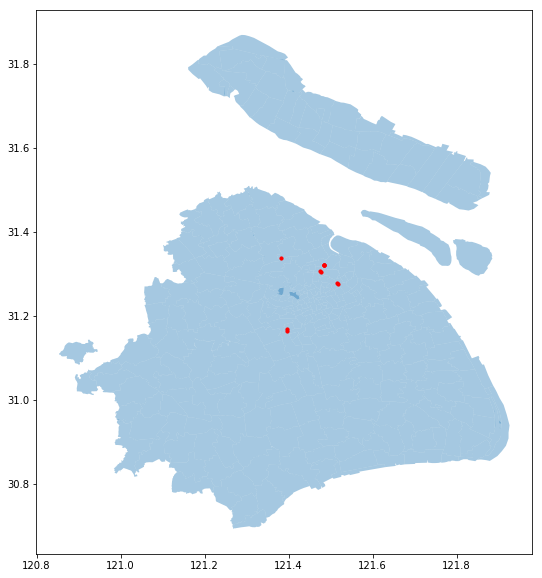

In [45]:
fig, ax = plt.subplots(figsize = (10,10))
city_map = gpd.read_file('/Users/valarian/SJTU/SJTU/毕业论文/Data/data/shanghaitown/shanghaitown.shp')
city_map.plot(ax = ax, alpha = 0.4)
geo_df.plot(ax = ax, color = 'r',markersize = 10)

In [38]:
geometry = [Point(xy) for xy in zip(dt.lng, dt.lat)]
geometry[:3]
geo_df = gpd.GeoDataFrame(dt, geometry = geometry)
geo_df.head()

,bid,lat,lng,time,day,hms,geometry
1026943,jAPOol,31.320448,121.483395,2017-6-27 00:00:00,2017-6-27,00:00:00,POINT (121.4833954536 31.3204475911)
1027134,lrR4ym,31.337881,121.381797,2017-6-27 00:00:00,2017-6-27,00:00:00,POINT (121.3817966949 31.3378811468)
1032505,2mN54R,31.320374,121.484072,2017-6-27 00:00:00,2017-6-27,00:00:00,POINT (121.4840724388 31.3203737471)
1026932,jKoYbP,31.320390,121.483486,2017-6-27 00:00:00,2017-6-27,00:00:00,POINT (121.483486434 31.3203904167)
1031140,9gq6oB,31.306877,121.474968,2017-6-27 00:00:00,2017-6-27,00:00:00,POINT (121.4749683324 31.3068767639)
